In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

Получить представлении о наборе данных с помощью методов shape, head,
describe, info библиотеки pandas.

In [17]:
from google.colab import drive
drive.mount('/content/gdrive')

file_path = '/content/gdrive/My Drive/50_Startups.csv'
df = pd.read_csv(file_path)

print("Первые 5 строк:")
display(df.head())

print("\nРазмер датасета (строк, столбцов):", df.shape)

print("\nИнформация о датафрейме:")
df.info()

print("\nОписательная статистика:")
display(df.describe())

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Первые 5 строк:


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94



Размер датасета (строк, столбцов): (50, 5)

Информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB

Описательная статистика:


,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


первичный анализ датафейма

In [9]:
print("\n=== Количество пропущенных значений ===")
print(df.isnull().sum())

print("\n=== Уникальные значения в каждом столбце ===")
for col in df.columns:
    print(f"Column '{col}': {df[col].nunique()} unique values")



=== Количество пропущенных значений ===
R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

=== Уникальные значения в каждом столбце ===
Column 'R&D Spend': 49 unique values
Column 'Administration': 50 unique values
Column 'Marketing Spend': 48 unique values
Column 'State': 3 unique values
Column 'Profit': 50 unique values


Разделение на признаки X и целевую переменную y

In [10]:
y = df['Profit']

X = df.drop('Profit', axis=1)

print("=== Признаки X (первые 5 строк) ===")
display(X.head())

print("=== Целевая переменная y (первые 5 значений) ===")
print(y.head().to_list())

=== Признаки X (первые 5 строк) ===


,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


=== Целевая переменная y (первые 5 значений) ===
[192261.83, 191792.06, 191050.39, 182901.99, 166187.94]


закодировать категориальные признаки в дискретные величины с помощью
методов библиотеки sklearn; и нормализация данных

In [25]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['State_encoded'] = label_encoder.fit_transform(df['State'])

#удаляю исходный столбец 'State' и оставляю закодированный
X = df.drop(['Profit', 'State'], axis=1)
y = df['Profit']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("=== Признаки после кодирования и масштабирования ===")
display(X_scaled.head())

=== Признаки после кодирования и масштабирования ===


,R&D Spend,Administration,Marketing Spend,State_encoded
0,2.016411,0.560753,2.153943,1.212678
1,1.955860,1.082807,1.923600,-1.212678
2,1.754364,-0.728257,1.626528,0.000000
3,1.554784,-0.096365,1.422210,1.212678
4,1.504937,-1.079919,1.281528,0.000000


разделение датафрейма на тестовую и тренировочную части

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

Размер обучающей выборки: (40, 4)
Размер тестовой выборки: (10, 4)


Создаем и обучаем модель

In [29]:
#модель
model = LinearRegression()
model.fit(X_train, y_train)

X_test_scaled = scaler.transform(X_test)

#предсказания
y_pred = model.predict(X_test_scaled)

Создание прогноза и оценка качества модели

In [33]:
#расчет RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"\nRoot Mean Squared Error (RMSE): {rmse}")

#R²
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.2f}")

score = model.score(X_test_scaled, y_test)
print(f"Model Score (R²): {score:.6f}")


Root Mean Squared Error (RMSE): 10479.338688008027
R²: 0.86
Model Score (R²): 0.864389


Вывод уравнения линейной регрессии

In [34]:
coefficients = model.coef_
intercept = model.intercept_

print("\n Уравнение линейной регрессии")
print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")

feature_names = X.columns.tolist()
equation = f"Profit = {intercept:.4f} "
for i, coef in enumerate(coefficients):
    equation += f"+ ({coef:.4f}) * {feature_names[i]} "

print(f"\nУравнение: {equation}")


 Уравнение линейной регрессии
Coefficients: [ 3.65251649e+04 -1.88357234e+03  3.78444552e+03 -1.38703803e+01]
Intercept: 111677.16370134428

Уравнение: Profit = 111677.1637 + (36525.1649) * R&D Spend + (-1883.5723) * Administration + (3784.4455) * Marketing Spend + (-13.8704) * State_encoded 


Визуализация фактических vs предсказанных значений

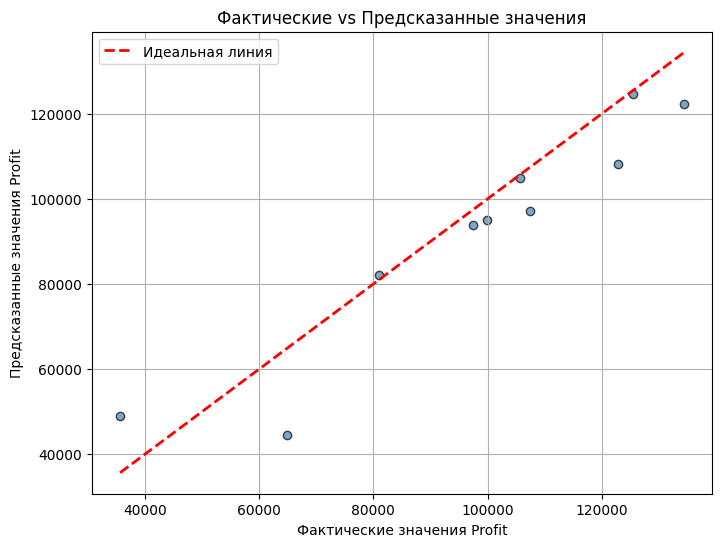

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='steelblue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Идеальная линия')
plt.xlabel('Фактические значения Profit')
plt.ylabel('Предсказанные значения Profit')
plt.title('Фактические vs Предсказанные значения')
plt.legend()
plt.grid(True)
plt.show()

Диаграмма остатков

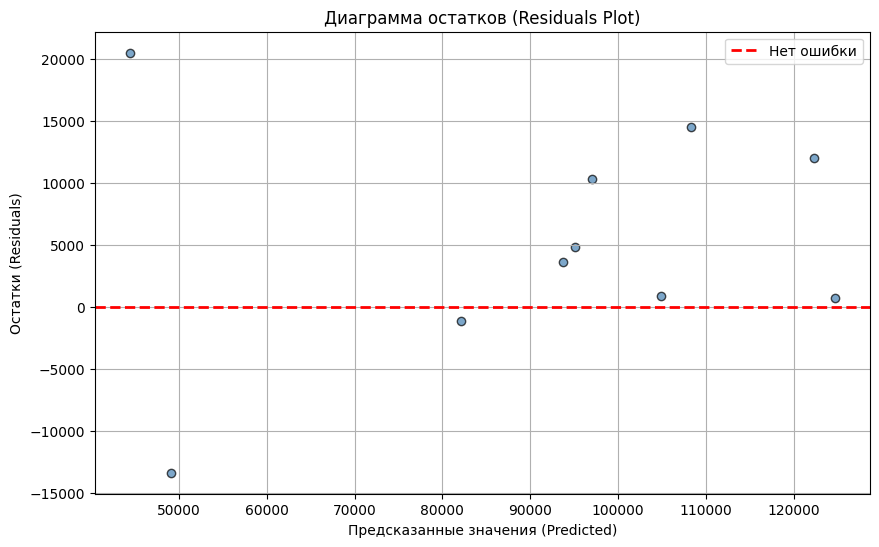

In [36]:
#остатки
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='steelblue', edgecolors='k')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Нет ошибки')
plt.xlabel('Предсказанные значения (Predicted)')
plt.ylabel('Остатки (Residuals)')
plt.title('Диаграмма остатков (Residuals Plot)')
plt.legend()
plt.grid(True)
plt.show()